In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'image.cmap': 'coolwarm'})
import seaborn as sns

import nibabel as nib
import os

from sklearn.cluster import KMeans
from sklearn.metrics import explained_variance_score, silhouette_samples, silhouette_score

from scipy.spatial.distance import correlation
from sklearn.metrics import silhouette_score

from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.silhouette import silhouette

from scipy.signal import hilbert, fftconvolve
from scipy.linalg import eigh

import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

folder = '/data/barzon/HCP/'

directions = ['RL', 'LR']
TR = 0.72

In [2]:
### Get subjects names
subjs = [fname.split('.')[0] for fname in os.listdir(folder) if not "parc" in fname]
subjs = np.unique(subjs)
print('N subjects:', len(subjs))

### Get parc
parcs = [fname.split('.')[0] for fname in os.listdir(folder+'parcellations/') ] #if 'Tian' in fname
parcs = np.unique(parcs)
print('N parcs:', len(parcs))
print(parcs)

### Get tasks
tasks = [fname.split('.')[0] for fname in os.listdir(folder+subjs[0]+'/') if ('fMRI' in fname)]

tasks_lr = [fname for fname in tasks if 'LR' in fname]
tasks_rl = [fname for fname in tasks if 'RL' in fname]

task_name = [fname.split('_')[1] for fname in tasks_lr]

print('N tasks:', len(task_name))
print(task_name)

N subjects: 177
N parcs: 5
['Schaefer2018_100Parcels_7Networks_order'
 'Schaefer2018_100Parcels_7Networks_order_Tian_Subcortex_S1'
 'Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1'
 'Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1_label'
 'Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S1']
N tasks: 9
['REST1', 'REST2', 'EMOTION', 'GAMBLING', 'LANGUAGE', 'MOTOR', 'RELATIONAL', 'SOCIAL', 'WM']


In [3]:
### Load data
parc = parcs[1]
subj_id = subjs[0]
current_folder = folder + subj_id + '/'

data_lr = [nib.load(current_folder+task+'/'+task+'_'+parc+'.ptseries.nii').get_fdata() for task in tasks_lr]
data_rl = [nib.load(current_folder+task+'/'+task+'_'+parc+'.ptseries.nii').get_fdata() for task in tasks_rl]

data_single = [ np.concatenate( [data_lr[idx], data_rl[idx]] ) for idx in range(len(tasks_lr))]
data_conc = np.vstack(data_single)
### Print total duration for each task
#[tmp.shape for tmp in data]

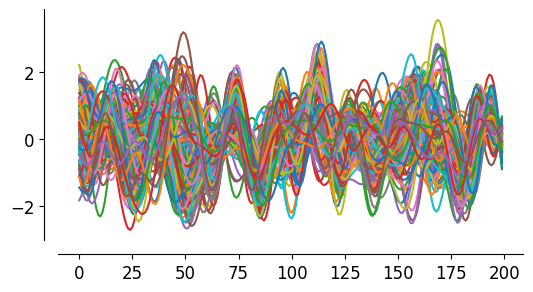

In [5]:
plt.figure(figsize=(6,3))
plt.plot(data_single[0][-200:])
sns.despine(offset=10)
plt.show()

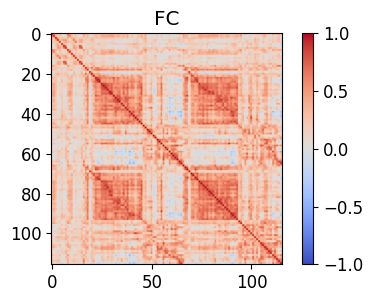

In [48]:
plt.figure(figsize=(5,3))
plt.imshow(np.corrcoef(data_single[0].T), vmin=-1, vmax=1)
plt.colorbar()
plt.title('FC')
plt.show()

In [5]:
### Load resting for all subjects
'''
fraction_data = 10

task = tasks_lr[0]
print(task)

data_resting = [nib.load(folder+subj_id+'/'+task+'/'+task+'_'+parc+'.ptseries.nii').get_fdata() for subj_id in subjs[:100]]
data_resting = [tmp[-tmp.shape[0]//fraction_data:] for tmp in data_resting]
data_conc = np.vstack(data_resting)
print(data_conc.shape)
'''

"\nfraction_data = 10\n\ntask = tasks_lr[0]\nprint(task)\n\ndata_resting = [nib.load(folder+subj_id+'/'+task+'/'+task+'_'+parc+'.ptseries.nii').get_fdata() for subj_id in subjs[:100]]\ndata_resting = [tmp[-tmp.shape[0]//fraction_data:] for tmp in data_resting]\ndata_conc = np.vstack(data_resting)\nprint(data_conc.shape)\n"

In [3]:
### Load all data for all subjects
parc = parcs[1]
total_subj = 50

data_all = []

for idx_id, subj_id in enumerate(subjs[:total_subj]):
    if idx_id < total_subj//2:
        use_lr = True
    else:
        use_lr= False
    
    print(f'#### SUBJ {subj_id} ####')
    current_folder = folder + subj_id + '/'

    data_lr = [nib.load(current_folder+task+'/'+task+'_'+parc+'.ptseries.nii').get_fdata() for task in tasks_lr]
    data_rl = [nib.load(current_folder+task+'/'+task+'_'+parc+'.ptseries.nii').get_fdata() for task in tasks_rl]
    
    if use_lr:
        data_all += data_lr
    else:
        data_all += data_rl
        
data_all = np.vstack(data_all)

#### SUBJ 100206 ####
#### SUBJ 100408 ####
#### SUBJ 101006 ####
#### SUBJ 102311 ####
#### SUBJ 102513 ####
#### SUBJ 102614 ####
#### SUBJ 103111 ####
#### SUBJ 103414 ####
#### SUBJ 108020 ####
#### SUBJ 108222 ####
#### SUBJ 110007 ####
#### SUBJ 111009 ####
#### SUBJ 112516 ####
#### SUBJ 112920 ####
#### SUBJ 113316 ####
#### SUBJ 113619 ####
#### SUBJ 117930 ####
#### SUBJ 118124 ####
#### SUBJ 118225 ####
#### SUBJ 118730 ####
#### SUBJ 118831 ####
#### SUBJ 118932 ####
#### SUBJ 119126 ####
#### SUBJ 120212 ####
#### SUBJ 120414 ####
#### SUBJ 126325 ####
#### SUBJ 126426 ####
#### SUBJ 127933 ####
#### SUBJ 128632 ####
#### SUBJ 129028 ####
#### SUBJ 129129 ####
#### SUBJ 130013 ####
#### SUBJ 130114 ####
#### SUBJ 133928 ####
#### SUBJ 134021 ####
#### SUBJ 134324 ####
#### SUBJ 135528 ####
#### SUBJ 135629 ####
#### SUBJ 135932 ####
#### SUBJ 136227 ####
#### SUBJ 136833 ####
#### SUBJ 143224 ####
#### SUBJ 144832 ####
#### SUBJ 146331 ####
#### SUBJ 146432 ####
#### SUBJ 

# DFS

In [85]:
data_to_sliding = data_all

# Usefuls params
window = 80
skip = 5

# Array to store
corrs = []
leidas = []
utm = []

idx_utm = np.triu_indices(data_all[0].shape[1])

# Sliding window
for idx_cond in range(len(data_to_sliding)):
    print(f'[*] {idx_cond+1}/{len(data_to_sliding)}')
    
    tmp_data = data_to_sliding[idx_cond]

    total_steps = tmp_data.shape[0]
    n_win = (total_steps - window) // skip
    
    for idx_win in range(n_win):
        ### Get window
        data_win = tmp_data[idx_win*skip:window+idx_win*skip]
    
        ### Compute FC
        tmp_corr = np.corrcoef(data_win.T)
        corrs.append(tmp_corr)
        tmp_corr = np.arctanh(tmp_corr)
        tmp_corr[np.isnan(tmp_corr)] = 0
        tmp_corr[np.isinf(tmp_corr)] = 0

        ### Compute leading eigenvectors
        eigvals, eigvec = eigh(tmp_corr)
        leading = eigvec[:,np.argmax(eigvals)]
        
        ### Compute upper triangular matrix of v1@v1
        v1_v1 = leading.reshape(-1,1) * leading
        v1_v1 = v1_v1[idx_utm]
    
        ### Store results
        leidas.append(leading)
        utm.append(v1_v1)
    
corrs = np.stack(corrs)
leidas = np.vstack(leidas)
utm = np.vstack(utm)

[*] 1/54


/tmp/ipykernel_22265/2853347429.py:30: RuntimeWarning: divide by zero encountered in arctanh
  tmp_corr = np.arctanh(tmp_corr)


[*] 2/54
[*] 3/54
[*] 4/54
[*] 5/54
[*] 6/54
[*] 7/54
[*] 8/54
[*] 9/54
[*] 10/54
[*] 11/54
[*] 12/54
[*] 13/54
[*] 14/54
[*] 15/54
[*] 16/54
[*] 17/54
[*] 18/54
[*] 19/54
[*] 20/54
[*] 21/54
[*] 22/54
[*] 23/54
[*] 24/54
[*] 25/54
[*] 26/54
[*] 27/54
[*] 28/54
[*] 29/54
[*] 30/54
[*] 31/54
[*] 32/54
[*] 33/54
[*] 34/54
[*] 35/54
[*] 36/54
[*] 37/54
[*] 38/54
[*] 39/54
[*] 40/54
[*] 41/54
[*] 42/54
[*] 43/54
[*] 44/54
[*] 45/54
[*] 46/54
[*] 47/54
[*] 48/54
[*] 49/54
[*] 50/54
[*] 51/54
[*] 52/54
[*] 53/54
[*] 54/54


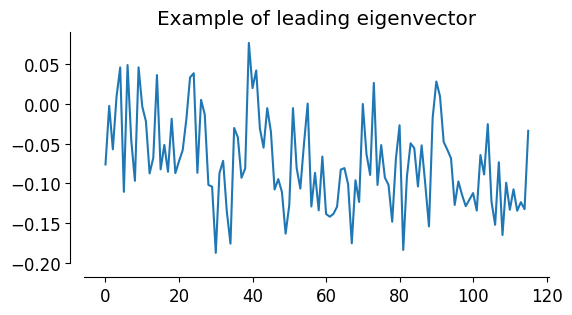

In [86]:
plt.figure(figsize=(6,3))
plt.plot(leidas[0])
plt.title('Example of leading eigenvector')
sns.despine(offset=10)
plt.show()

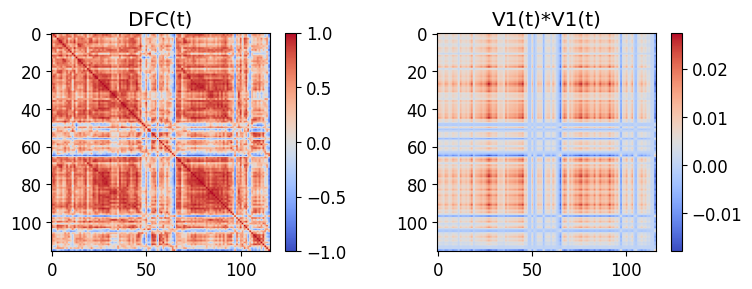

In [76]:
idx = 60

plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.imshow(corrs[idx], vmin=-1, vmax=1)
plt.colorbar()
plt.title('DFC(t)')

plt.subplot(1,2,2)
plt.imshow(( leidas[idx].reshape(-1,1) * leidas[idx] ))
plt.colorbar()
plt.title('V1(t)*V1(t)')

plt.tight_layout()
plt.show()

In [36]:
data_to_cluster = leidas

min_states = 2
max_states = 10
range_n_clusters = np.arange(min_states, max_states+1)

models = []
scores = []
silhouette = []
silhouette_values = []

for n_clusters in range_n_clusters:
    print(f'[*] N STATES {n_clusters}')
    clusterer = KMeans(n_clusters=n_clusters)#, random_state=10
    cluster_labels = clusterer.fit_predict(data_to_cluster)
    
    silhouette_avg = silhouette_score(data_to_cluster, cluster_labels)
    
    score = clusterer.score(data_to_cluster, cluster_labels)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_to_cluster, cluster_labels)
    
    models.append(clusterer)
    scores.append(scores)
    silhouette.append(silhouette_avg)
    silhouette_values.append(sample_silhouette_values)

[*] N STATES 2
[*] N STATES 3
[*] N STATES 4
[*] N STATES 5
[*] N STATES 6
[*] N STATES 7
[*] N STATES 8
[*] N STATES 9
[*] N STATES 10


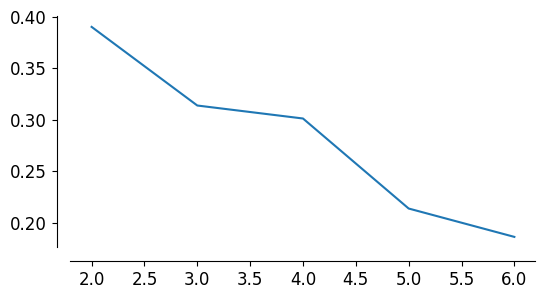

In [32]:
plt.figure(figsize=(6,3))
plt.plot(range_n_clusters, silhouette)
sns.despine(offset=10)
plt.show()

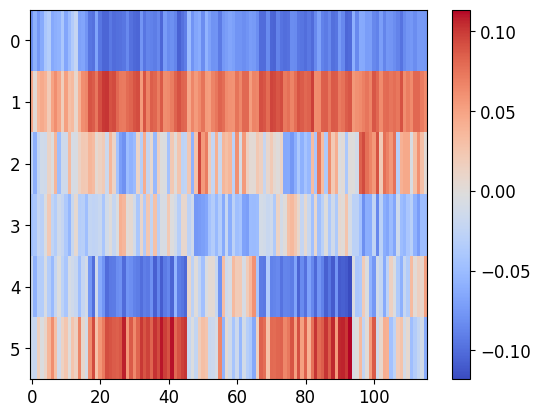

In [34]:
plt.imshow(models[-1].cluster_centers_, aspect='auto')
plt.colorbar()
plt.show()

# FS

In [14]:
### Load all data for all subjects
parc = parcs[1]

total_subj = 40
frac = 15

data_all = []

for idx_id, subj_id in enumerate(subjs[:total_subj]):
    if idx_id < total_subj//2:
        use_lr = True
    else:
        use_lr= False
    
    print(f'#### SUBJ {subj_id} ####')
    current_folder = folder + subj_id + '/'

    if use_lr:
        data_to_add = [nib.load(current_folder+task+'/'+task+'_'+parc+'.ptseries.nii').get_fdata() for task in tasks_lr]
    else:
        data_to_add = [nib.load(current_folder+task+'/'+task+'_'+parc+'.ptseries.nii').get_fdata() for task in tasks_rl]
    
    if frac>1:
        data_to_add = [tmp[np.random.choice(np.arange(tmp.shape[0]), tmp.shape[0]//frac, replace=False)] for tmp in data_to_add]
    
    data_all += data_to_add
        
data_all = np.vstack(data_all)

#### SUBJ 100206 ####
#### SUBJ 100408 ####
#### SUBJ 101006 ####
#### SUBJ 102311 ####
#### SUBJ 102513 ####
#### SUBJ 102614 ####
#### SUBJ 103111 ####
#### SUBJ 103414 ####
#### SUBJ 108020 ####
#### SUBJ 108222 ####
#### SUBJ 110007 ####
#### SUBJ 111009 ####
#### SUBJ 112516 ####
#### SUBJ 112920 ####
#### SUBJ 113316 ####
#### SUBJ 113619 ####
#### SUBJ 117930 ####
#### SUBJ 118124 ####
#### SUBJ 118225 ####
#### SUBJ 118730 ####
#### SUBJ 118831 ####
#### SUBJ 118932 ####
#### SUBJ 119126 ####
#### SUBJ 120212 ####
#### SUBJ 120414 ####
#### SUBJ 126325 ####
#### SUBJ 126426 ####
#### SUBJ 127933 ####
#### SUBJ 128632 ####
#### SUBJ 129028 ####
#### SUBJ 129129 ####
#### SUBJ 130013 ####
#### SUBJ 130114 ####
#### SUBJ 133928 ####
#### SUBJ 134021 ####
#### SUBJ 134324 ####
#### SUBJ 135528 ####
#### SUBJ 135629 ####
#### SUBJ 135932 ####
#### SUBJ 136227 ####


In [64]:
print(data_all.shape)

(11440, 116)


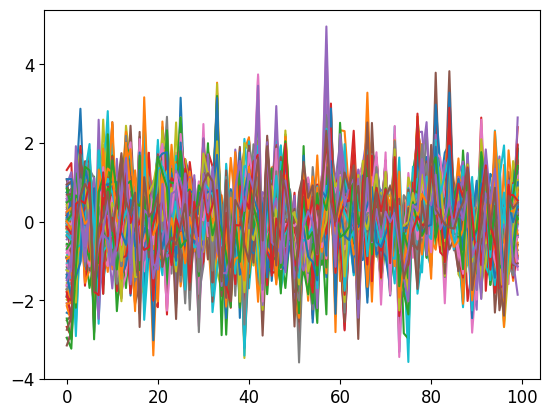

In [13]:
plt.plot(data_all[:100])
plt.show()

In [15]:
def reframe_labels(clusters, T):
    labels = np.zeros(T)

    for idx in range(1, len(clusters)):
        labels[clusters[idx]] = idx
        
    return labels

data_to_cluster = data_all

T = data_to_cluster.shape[0]

min_states = 2
max_states = 10
range_n_clusters = np.arange(min_states, max_states+1)

models = []
scores = []
centers = []
clusters = []

for n_clusters in range_n_clusters:
    # define a custom metric
    metric = distance_metric(type_metric.USER_DEFINED, func=correlation)

    # carry out a km++ init
    initial_centers = kmeans_plusplus_initializer(data_to_cluster, n_clusters).initialize()

    # execute kmeans
    kmeans_instance = kmeans(data_to_cluster, initial_centers, metric=metric)

    # run cluster analysis
    kmeans_instance.process()

    # get clusts
    tmp_clusters = kmeans_instance.get_clusters()
    tmp_clusters = reframe_labels(tmp_clusters, T)
    tmp_centers = kmeans_instance.get_centers()

    # get silhouette
    score = silhouette_score(data_to_cluster, tmp_clusters, metric='correlation')
    wce = kmeans_instance
    
    # store results
    models.append(kmeans_instance)
    scores.append(score)
    centers.append(np.array(tmp_centers))
    clusters.append(tmp_clusters)
    
    print(f'[*] N states: {n_clusters} - score {score}')

[*] N states: 2 - score 0.14011914901359857
[*] N states: 3 - score 0.10579892884069252
[*] N states: 4 - score 0.08299914822790416
[*] N states: 5 - score 0.0737324300639127
[*] N states: 6 - score 0.07100435143048212
[*] N states: 7 - score 0.0639851266097073
[*] N states: 8 - score 0.06108602783385183
[*] N states: 9 - score 0.06141663523079049
[*] N states: 10 - score 0.05597810464971227


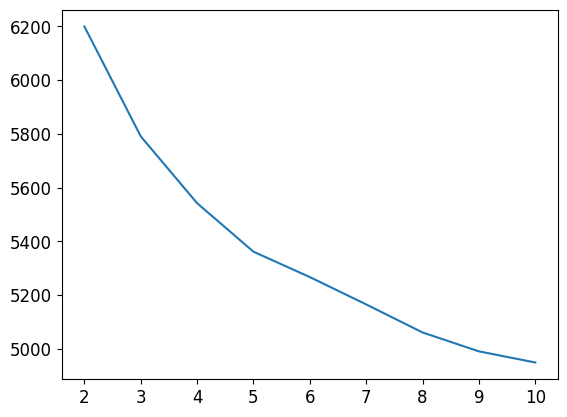

In [9]:
plt.plot(range_n_clusters, [tmp.get_total_wce() for tmp in models])

plt.show()

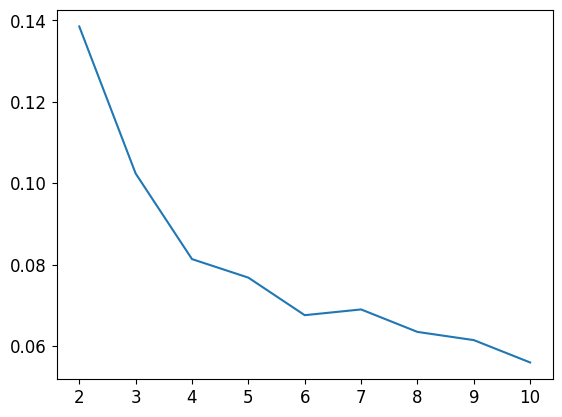

In [18]:
plt.plot(range_n_clusters, scores)

plt.show()

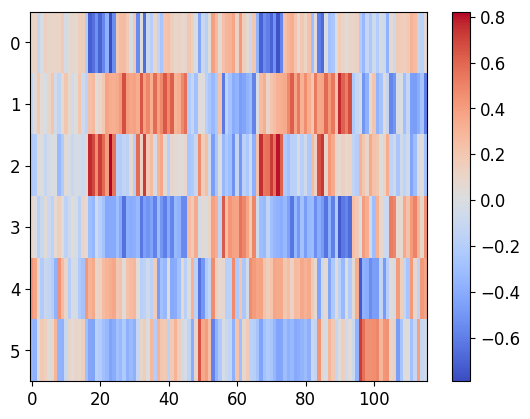

In [54]:
plt.imshow(centers[4], aspect='auto')
plt.colorbar()
plt.show()

In [18]:
def compute_transition_matrix2(data, n, step = 1):
    
    t = np.array(data)
    step = step
    total_inds = t.size - (step + 1) + 1
    t_strided = np.lib.stride_tricks.as_strided(
                                    t,
                                    shape = (total_inds, 2),
                                    strides = (t.strides[0], step * t.strides[0]))
    
    inds, counts = np.unique(t_strided, axis = 0, return_counts = True)

    P = np.zeros((n, n))
    P[inds[:, 0], inds[:, 1]] = counts
    
    #sums = P.sum(axis = 1)
    # Avoid divide by zero error by normalizing only non-zero rows
    #P[sums != 0] = P[sums != 0] / sums[sums != 0][:, None]
    
    # P = P / P.sum(axis = 1)[:, None]
    return P

In [78]:
### Load all data for all subjects
data_all = []

#results = [pd.DataFrame(columns=[['subj', 'task'] + np.arange(n_clusters).astype(str).tolist()]) for n_clusters in range_n_clusters]
results = [[] for _ in range_n_clusters]
trans_matrix = [[] for _ in range_n_clusters]

for idx_id, subj_id in enumerate(subjs[:total_subj]):
    if idx_id < total_subj//2:
        use_lr = True
    else:
        use_lr= False
    
    print(f'#### SUBJ {subj_id} ####')
    current_folder = folder + subj_id + '/'

    if use_lr:
        data_to_add = [nib.load(current_folder+task+'/'+task+'_'+parc+'.ptseries.nii').get_fdata() for task in tasks_lr]
    else:
        data_to_add = [nib.load(current_folder+task+'/'+task+'_'+parc+'.ptseries.nii').get_fdata() for task in tasks_rl]
    
    for idx_cond, data_cond in enumerate(data_to_add):
        for idx_clusters, n_clusters in enumerate(range_n_clusters):
            tmp = models[idx_clusters].predict(data_cond)
            #counts = np.unique(tmp, return_counts=True)[1]
            counts = np.bincount(tmp)
            counts = counts / counts.sum()
            results[idx_clusters].append([subj_id, task_name[idx_cond]]+counts.tolist())
            
            if idx_cond==0:
                trans_matrix[idx_clusters].append(compute_transition_matrix2(tmp, n_clusters))

#### SUBJ 100206 ####
#### SUBJ 100408 ####
#### SUBJ 101006 ####
#### SUBJ 102311 ####
#### SUBJ 102513 ####
#### SUBJ 102614 ####
#### SUBJ 103111 ####
#### SUBJ 103414 ####
#### SUBJ 108020 ####
#### SUBJ 108222 ####
#### SUBJ 110007 ####
#### SUBJ 111009 ####
#### SUBJ 112516 ####
#### SUBJ 112920 ####
#### SUBJ 113316 ####
#### SUBJ 113619 ####
#### SUBJ 117930 ####
#### SUBJ 118124 ####
#### SUBJ 118225 ####
#### SUBJ 118730 ####
#### SUBJ 118831 ####
#### SUBJ 118932 ####
#### SUBJ 119126 ####
#### SUBJ 120212 ####
#### SUBJ 120414 ####
#### SUBJ 126325 ####
#### SUBJ 126426 ####
#### SUBJ 127933 ####
#### SUBJ 128632 ####
#### SUBJ 129028 ####
#### SUBJ 129129 ####
#### SUBJ 130013 ####
#### SUBJ 130114 ####
#### SUBJ 133928 ####
#### SUBJ 134021 ####
#### SUBJ 134324 ####
#### SUBJ 135528 ####
#### SUBJ 135629 ####
#### SUBJ 135932 ####
#### SUBJ 136227 ####


In [115]:
results[-1]

[['100206',
  'REST1',
  0.08833333333333333,
  0.03833333333333333,
  0.07083333333333333,
  0.12833333333333333,
  0.1575,
  0.09083333333333334,
  0.085,
  0.09666666666666666,
  0.09333333333333334,
  0.15083333333333335],
 ['100206',
  'REST2',
  0.09083333333333334,
  0.06666666666666667,
  0.14,
  0.13083333333333333,
  0.10333333333333333,
  0.12916666666666668,
  0.07666666666666666,
  0.08416666666666667,
  0.07416666666666667,
  0.10416666666666667],
 ['100206',
  'EMOTION',
  0.056818181818181816,
  0.03977272727272727,
  0.2159090909090909,
  0.017045454545454544,
  0.017045454545454544,
  0.1590909090909091,
  0.14204545454545456,
  0.011363636363636364,
  0.19886363636363635,
  0.14204545454545456],
 ['100206',
  'GAMBLING',
  0.18972332015810275,
  0.08300395256916997,
  0.1225296442687747,
  0.003952569169960474,
  0.16996047430830039,
  0.011857707509881422,
  0.019762845849802372,
  0.05533596837944664,
  0.10276679841897234,
  0.24110671936758893],
 ['100206',
  'LA

In [133]:
### Convert results to pandas dataframes
datas = [pd.DataFrame(results[idx_clusters], columns=['subj', 'task'] + np.arange(n_clusters).astype(str).tolist()) 
         for idx_clusters, n_clusters in enumerate(range_n_clusters)]

In [117]:
# Stack transition matrices
trans_mat_all = [np.stack(tmp) for tmp in trans_matrix]
trans_mat_avg = [np.sum(tmp, axis=0) for tmp in trans_mat_all]

In [140]:
### Get average results
datas_avg = [datas[idx_clusters].groupby(['task'])[np.arange(n_clusters).astype(str).tolist()].mean()
             for idx_clusters, n_clusters in enumerate(range_n_clusters)]

In [42]:
### Save dataset
[datas[idx_clusters].to_csv(f'clusters_occurrence_k_{n_clusters}.csv', index=False)
 for idx_clusters, n_clusters in enumerate(range_n_clusters)]

[None, None, None, None, None, None, None, None, None]

In [43]:
### Save centroids
[np.savetxt(f'cluster_centroids_k_{n_clusters}.csv', centers[idx_clusters], delimiter=",")
 for idx_clusters, n_clusters in enumerate(range_n_clusters)]

[None, None, None, None, None, None, None, None, None]

In [145]:
### Save transitions
[np.savetxt(f'transitions_grouped_{n_clusters}.csv', trans_mat_avg[idx_clusters], delimiter=",")
 for idx_clusters, n_clusters in enumerate(range_n_clusters)]

[None, None, None, None, None, None, None, None, None]

In [144]:
### Save average
[datas_avg[idx_clusters].to_csv(f'clusters_occurrence_grouped_k_{n_clusters}.csv', index=False)
 for idx_clusters, n_clusters in enumerate(range_n_clusters)]

[None, None, None, None, None, None, None, None, None]

In [20]:
ttt = [0,0,0,1]

In [146]:
compute_transition_matrix2(ttt, 2)

array([[2., 1.],
       [0., 0.]])

In [69]:
P = compute_transition_matrix2(np.random.randint(0,10, int(1e3)), 10)

# Plot

In [147]:
import networkx as nx

In [157]:
os.listdir(folder+'parcellations/')

['Schaefer2018_100Parcels_7Networks_order_Tian_Subcortex_S1.dlabel.nii',
 'Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1_label.txt',
 'Schaefer2018_200Parcels_7Networks_order_Tian_Subcortex_S1.dlabel.nii',
 'Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S1.dlabel.nii',
 'Schaefer2018_100Parcels_7Networks_order.dlabel.nii',
 'Schaefer2018_100Parcels_7Networks_order_Tian_Subcortex_S1_label.txt']

In [159]:
parc

'Schaefer2018_100Parcels_7Networks_order_Tian_Subcortex_S1'

In [160]:
coords = np.loadtxt(folder+'parcellations/'+f'{parc}_label.txt', dtype=str, delimiter='\n')
names = coords[::2]
coords = coords[1::2]
coords = [tmp.split(' ')[1:4] for tmp in coords]
coords = np.array(coords, dtype=int)

In [161]:
adj = np.zeros((len(names),len(names)))

In [162]:
G = nx.from_numpy_array(adj)

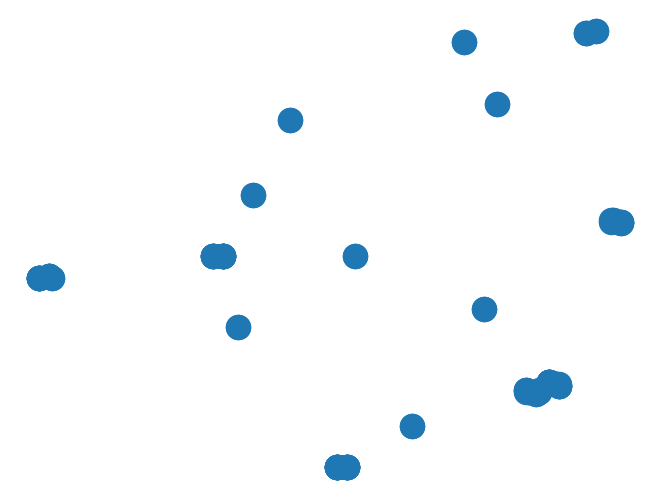

In [163]:
nx.draw(G, pos=coords[:,[0,1]])

In [164]:
coords.shape

(116, 3)

In [165]:
coords[:,0]

array([171,  86, 127, 150, 184, 179, 101,  80, 171,  86, 127, 150, 184,
       179, 101,  80, 120, 120, 120, 120, 120, 120, 120, 120, 120,  70,
        70,  70,  70,  70,  70,   0,   0,   0,   0,   0,   0,   0,   0,
       196, 196, 196, 196, 197, 197, 197, 220, 220, 220, 230, 230, 231,
       231, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205,
       205, 124, 124, 124, 124, 124, 124, 124, 124,  74,  74,  74,  74,
        74,  74,  74,  74,   4,   4,   4,   4,   4,   5,   5, 201, 201,
       201, 200, 200, 224, 224, 234, 234, 233, 233, 233, 233, 234, 234,
       234, 209, 209, 209, 209, 209, 209, 208, 208, 208, 208, 208])